In [1]:
import pandas as pd

In [526]:
df = pd.read_csv('20201020-vk-spb_today.csv', index_col=['id'])

In [527]:
df = df[df['text'].notnull()]

In [528]:
df['date'] = df.apply(lambda x: pd.to_datetime(x['date'], unit='s'), axis=1)

In [529]:
df = df[~df['text'].str.contains('угнан', case=False)]
df = df[~df['text'].str.contains('угнали', case=False)]
df = df[~df['text'].str.contains('украден', case=False)]
df = df[~df['text'].str.contains('украли', case=False)]
df = df[~df['text'].str.contains('ограбления', case=False)]
df = df[~df['text'].str.contains('пропал', case=False)]
df = df[~df['text'].str.contains('Дайджест новостей Мегаполиса за прошедшие сутки', case=False)]
df = df[~df['text'].str.contains('Новости города за последние сутки', case=False)]
df = df[~df['text'].str.contains('Новости города за сегодняшний день', case=False)]
df = df[~df['text'].str.contains('Новости города за день', case=False)]
df = df[~df['text'].str.contains('обзор новостей', case=False)]
df = df[~df['text'].str.contains('Новости нашего Мегаполиса', case=False)]
df = df[~df['text'].str.contains('эвакуация', case=False)]
df = df[~df['text'].str.contains('жильцы', case=False)]
df = df[~df['text'].str.contains('стреляют', case=False)]
df = df[~df['text'].str.contains('бомж', case=False)]

In [530]:
df = df[df['text'].str.len() <= 1000]

In [531]:
df['accident'] = 0

In [532]:
df.loc[df['text'].str.contains('дтп', case=False, na=False), 'accident'] = 1
df.loc[df['text'].str.contains('авари', case=False, na=False), 'accident'] = 1
df.loc[df['text'].str.contains('сбили', case=False, na=False), 'accident'] = 1
df.loc[df['text'].str.contains('сбит', case=False, na=False), 'accident'] = 1
df.loc[df['text'].str.contains('вылетел', case=False, na=False), 'accident'] = 1
df.loc[df['text'].str.contains('врезался', case=False, na=False), 'accident'] = 1
df.loc[df['text'].str.contains('притерлись', case=False, na=False), 'accident'] = 1
df.loc[df['text'].str.contains('столкнулись', case=False, na=False), 'accident'] = 1
df.loc[df['text'].str.contains('паровоз', case=False, na=False), 'accident'] = 1
df.loc[df['text'].str.contains('догонял', case=False, na=False), 'accident'] = 1
df.loc[df['text'].str.contains('тройничок', case=False, na=False), 'accident'] = 1
df.loc[df['text'].str.contains('перегородили', case=False, na=False), 'accident'] = 1
df.loc[df['text'].str.contains('фура', case=False, na=False), 'accident'] = 1
df.loc[df['text'].str.contains('маршрутк', case=False, na=False), 'accident'] = 1
df.loc[df['text'].str.contains('мотоцикл', case=False, na=False), 'accident'] = 1

In [533]:
df.sample(3)

,text,date,comments,likes,reposts,views,attachments_count,from_id,owner_id,signer_id,accident
id,,,,,,,,,,,
13700386,Токийский дрифт автобуса на перекрёстке Ленинс...,2020-08-24 05:22:04,47,99,5,102559,1,-68471405,-68471405,340692601.0,0
8971566,Авария на перекрестке Коллонтай и пр. Большевиков,2018-05-30 05:06:13,0,41,2,90916,0,-68471405,-68471405,NaN,1
10600620,На международной.\nТаксист подбил две машины.\...,2019-02-21 12:12:01,72,63,1,110433,0,-68471405,-68471405,1697915.0,0


In [534]:
df['accident'].value_counts()

0    71003
1    43527
Name: accident, dtype: int64

In [535]:
df.shape

(114530, 11)

In [541]:
def sample_text(df, samples = 5):
    s = min(df.shape[0], samples)
    print(df.shape)
    for post_id, row in df.sample(s).iterrows():
        a = row['accident']
        l = len(row['text'])
        print('_' * 100)
        print(f'{post_id} (accident: {a} len: {l})')
        print(row['text'])

In [64]:
df[df['text'].str.contains('')]

,text,date,comments,likes,reposts,views,attachments_count,from_id,owner_id,signer_id
id,,,,,,,,,,
13909332,На улице Трефолева возле заправки Лукойл у фур...,2020-10-07 20:32:13,807,450,83,154777,7,-68471405,-68471405,422391233.0
13813634,Новости нашего Мегаполиса: \n\n1. Тело пенсион...,2020-09-18 20:02:22,99,71,1,108595,10,-68471405,-68471405,NaN
13811473,"Задержан мужчина, подозреваемый в травмировани...",2020-09-18 12:50:06,218,197,28,81935,2,-68471405,-68471405,NaN
13809928,"Сотрудники полиции обнаружили частный дом, где...",2020-09-18 09:08:08,284,307,12,159162,10,-68471405,-68471405,NaN
13805044,Собачьи бои на Ветеранов\n\nВзрослый человек б...,2020-09-16 22:20:12,134,73,9,77101,2,-68471405,-68471405,NaN
...,...,...,...,...,...,...,...,...,...,...
861,Немного автомобильного юмора 😊😉\nРасшифровки а...,2014-05-10 13:30:05,0,34,19,0,0,-68471405,-68471405,NaN
794,Немного автомобильного юмора 😊😉\nРасшифровки а...,2014-05-07 20:28:30,0,29,9,0,0,-68471405,-68471405,NaN
420,"Мотоциклист, влетевший под «Спринтер» на Карав...",2014-04-18 14:07:55,0,2,1,0,0,-68471405,-68471405,NaN


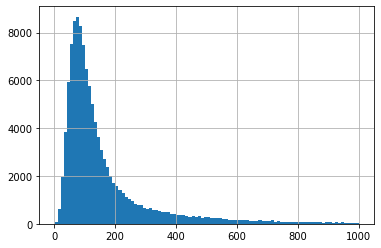

In [562]:
df['text'].str.len().hist(bins=100)

In [434]:
df['text'].str.len().describe()

count    116406.000000
mean        184.578140
std         275.020158
min           1.000000
25%          71.000000
50%         109.000000
75%         186.000000
max       10149.000000
Name: text, dtype: float64

In [475]:
df[df['accident'] == 1]['text'].str.len().describe()

count    44323.000000
mean       209.631027
std        282.709497
min          3.000000
25%         78.000000
50%        122.000000
75%        226.000000
max       6993.000000
Name: text, dtype: float64

In [567]:
df[df['accident'] == 1][['text', 'date', 'comments', 'likes', 'reposts', 'views']]

,text,date,comments,likes,reposts,views
id,,,,,,
13979013,Паровозик из 4х машин на Пискаревском над Шафи...,2020-10-20 19:36:23,8,15,0,23230
13978872,Мазда и Шкода устроили дтп на Гренадерской ули...,2020-10-20 19:01:36,6,23,2,33686
13978184,Двое столкнулись и стоят на выезде с Пархоменк...,2020-10-20 16:40:01,10,35,1,62495
13977833,Ищу свидетелей аварии произошедшей 19 октября ...,2020-10-20 15:46:56,11,23,4,51419
13977804,Уважаемы эксперты ПДД и адепты ДТП. Представля...,2020-10-20 15:42:25,264,65,1,51432
...,...,...,...,...,...,...
8,Авария в 8 часов утра 3.20.2014 на пр. Науки 1...,2014-03-21 10:57:24,0,2,0,0
5,ДТП произошло 20 марта в 17:58. Автомобиль БМВ...,2014-03-21 06:27:02,0,1,0,0
4,"Водителя занесло на повороте, а после столкнов...",2014-03-21 03:20:23,0,0,0,0


In [561]:
sample_text(
    df[
        (df['accident'] == 0) &
        (df['text'].str.len() >= 78) &
        (df['text'].str.len() <= 226)
    ]
)

(36697, 11)
____________________________________________________________________________________________________
621833 (accident: 0 len: 117)
Приморское шоссе , пупсик улетел (( как так произошло не понятно , водитель стоит в шоке , все живы !
Пробушки нет !)
____________________________________________________________________________________________________
2027153 (accident: 0 len: 172)
Что-то произошло в тц сенная. Три машины полиции и скорая, всех выгоняют

[id88805269|Ксения Орлова]:
Около входа , со стороны рынка , лежит сумка
Полицаи сказали из-за нее
____________________________________________________________________________________________________
2990225 (accident: 0 len: 131)
Огромная пробка от пересечения Дачного и Ветеранов до Лени Голикова. 
На Голикова не работает светофор, движение сильно затруднено.
____________________________________________________________________________________________________
7079817 (accident: 0 len: 145)
Вчера в 21:00 на Авиаконструкторов 25.

In [494]:
sample_text(
    df[
        (df['accident'] == 0) &
        (df['text'].str.len() < 78)
    ]
)

(23663, 11)
___________________________________________________
7279001 (accident: 0, len: 60)
На Киевском шоссе горит самосвал у поворота на Малое Карлино
___________________________________________________
876858 (accident: 0, len: 51)
Съезд на Пулково,2 скорые,ДПС.
Движение затруднено.
___________________________________________________
3054646 (accident: 0, len: 54)
Таран на перекрёстке Королева Байконурской  служб нет.
___________________________________________________
13310602 (accident: 0, len: 64)
ТРК ЛЕТО тоже плывет. Магазины заливает , а никого там даже нет.
___________________________________________________
5435048 (accident: 0, len: 68)
Классика жанра на Воронежской  улице, перед Обводным. 28.11.16 11:55


In [499]:
sample_text(
    df[(df['text'].str.len() < 69)]
)

(26585, 11)
____________________________________________________________________________________________________
11136946 (accident: 0, len: 54)
Дамы не разъехались на Кузнецовской перед Свеаборгской
____________________________________________________________________________________________________
1739580 (accident: 0, len: 58)
Художников 10. Все живы. даже светофор, хоть и лежит 21.55
____________________________________________________________________________________________________
13305473 (accident: 0, len: 46)
На Лиговском, у дома 60 авто оказалось на боку
____________________________________________________________________________________________________
326995 (accident: 1, len: 41)
Серьезное ДТП 
Просп. Народного Ополчения
____________________________________________________________________________________________________
4345830 (accident: 1, len: 40)
На пр.Добролюбова в 8:20 сгорел мотоцикл


In [338]:
sample_text(df[df['accident'] == 0])

(76672, 11)
___________________________________________________
10289181 (accident: 0)
Ребята нужна помощь джиперов, застряли по жести на Газели в Токсово на Санаторной 36
————-
Помогли
___________________________________________________
7113014 (accident: 0)
Солярис получил под зад по адресу Коллонтай 13. P.S. чуть дальше по ул. Коллонтай на перекрестке с пр. Большевиков не работает светофор
___________________________________________________
6885841 (accident: 0)
Станция метро Черная речка закрыта по тех.причинам. актуально на 14:45
Открыли в 15 48
___________________________________________________
6622691 (accident: 0)
В доме 5 корпус 1 на Маршала Казакова 
толком не понятно, что случидось, но вся парадная в дыму и выводят людей. Всех с праздником! Будьте аккуратнее!
___________________________________________________
8318724 (accident: 0)
На Московском пр-те перед 7-ой Красноармейской 3 игрока в догонялки


In [363]:
sample_text(df[df['accident'] == 0])

(76329, 11)
___________________________________________________
4854476 (accident: 0)
Угол Наставников и Ударников.  Золотистый седан и белый кроссовер. Жертв нет.
___________________________________________________
8450245 (accident: 0)
Рено на Троицком  мосту, наверное с рельсов выкинуло,служб нет,пробка есть в сторону центра.
___________________________________________________
13208460 (accident: 0)
Помните, мы несколько дней назад размещали новость о [https://vk.com/wall-68471405_13183921|вороне в гнезде покрытую льдом]? 

Наконец-то начало что-то происходить. Появился папа. Вместе с мамой задумчиво смотрят в гнездо периодически и уже кормят тех, кто вылупился, но их почти никогда не видно. Прячут, чтобы не замерзли.
А страшненькие они, пока новорожденные... Это просто жуть!

Фото: [id16044611|Елена Лесина]
___________________________________________________
8689859 (accident: 0)
В Смолячково, Курортного района.
___________________________________________________
1120589 (accident:

In [24]:
df[['likes', 'reposts', 'views', 'comments']].corr()

,likes,reposts,views,comments
likes,1.000000,0.887954,0.450440,0.183336
reposts,0.887954,1.000000,0.326351,0.061272
views,0.450440,0.326351,1.000000,0.466769
comments,0.183336,0.061272,0.466769,1.000000


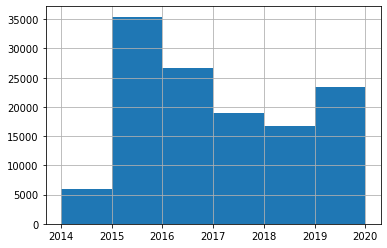

In [33]:
df['date'].dt.year.hist(bins=6)

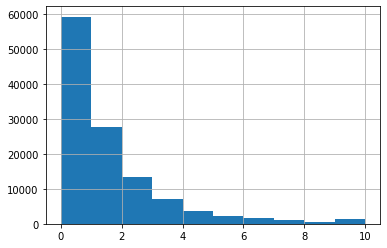

In [141]:
df['attachments_count'].hist(bins=10)

In [35]:
df[df['date'].dt.year == 2020]

,text,date,comments,likes,reposts,views,attachments_count,from_id,owner_id,signer_id
id,,,,,,,,,,
13979023,Новости нашего мегаполиса:\n\n1. Дефицит бюдже...,2020-10-20 19:38:27,34,19,0,20049,9,-68471405,-68471405,NaN
13979092,В ночь с 19 на 20 октября был угнан Рено Дасте...,2020-10-20 19:57:04,17,10,0,22263,3,-68471405,-68471405,22394006.0
13979085,Сегодня в промежутке 17.40-17.55 на парковке у...,2020-10-20 19:55:53,59,9,0,22659,1,-68471405,-68471405,22648.0
13979013,Паровозик из 4х машин на Пискаревском над Шафи...,2020-10-20 19:36:23,8,15,0,23230,1,-68471405,-68471405,35464517.0
13978872,Мазда и Шкода устроили дтп на Гренадерской ули...,2020-10-20 19:01:36,6,23,2,33686,2,-68471405,-68471405,425196.0
...,...,...,...,...,...,...,...,...,...,...
12477815,"Водители трёх машин, в центре Петербурга на ...",2020-01-01 03:10:21,153,324,6,158103,0,-68471405,-68471405,12004708.0
12477814,"В деревне Новополье горит дом, пожарных вызвали.",2020-01-01 03:08:49,47,60,4,144067,2,-68471405,-68471405,6716721.0
12477813,На Зверинской д. 7-9 серьезный пожар на чердак...,2020-01-01 03:08:40,67,80,3,125486,3,-68471405,-68471405,92347407.0


In [496]:
sample_text(
    df[df['attachments_count'] == 0]
)

(58562, 11)
____________________________________________________________________________________________________
3765155 (accident: 1, len: 122)
Страшное ДТП  на мосту перед заездом на КАД по Софийке в сторону города. 5 машит....2 жигули смялись. Пробке быть большой.
____________________________________________________________________________________________________
1125251 (accident: 1, len: 37)
Не ЧП и не дтп просто сердце над В.О.
____________________________________________________________________________________________________
7637008 (accident: 0, len: 72)
Горит квартира или мусоропровод на Пулковском шоссе 9/1, всех эвакуируют
____________________________________________________________________________________________________
4265130 (accident: 0, len: 36)
Только что с толкнулись на гончарной
____________________________________________________________________________________________________
10351013 (accident: 0, len: 200)
И снова очередные жопуцеловаши на путепроводе в Автово

```
df[
    df['text'].str.contains('разводк', case=False)
    & df['text'].str.contains('мост', case=False)
]
```

6971001
Серьезное ДТП у Кунсткамеры. Сбили женщину, вся в крови. Накрыта синим пакетом. Службы на месте. Видимо кто-то посмотрел разводку мостов...

In [162]:
# #ДТП
# #Авария
#spb_today
sample_text(
    df[
        df['text'].str.contains('разводк', case=False)
        & df['text'].str.contains('мост', case=False)
    ]
)

(22, 10)
___________________________________________________
305
График разводки мостов в Санкт-Петербурге на 2014 год!
Уже на этих выходных окончательно откроется сезон навигации по Неве. Сохраняйте себе график!
#СанктПетербург #мосты
___________________________________________________
524530
В Петербурге продолжается подготовка разводных мостов к сезону навигации. Четыре моста будут разведены в Петербурге в ночь на пятницу, 3 апреля, для проведения профилактических работ.
Как сообщили Neva.Today в КРТИ, будут разведены Дворцовый и Володарский мосты, мост Александра Невского и Гренадерский мост.

Дворцовый мост разведут с 1.25 до 2.50 и с 3.10 до 4.55 часов. Володарский мост - с 2.00 до 3.45 и с 4.15 до 5.45 часов.

Мост Александра Невского будет разведен с 2.20 до 5.10 часов. Разводка Гренадерского моста продлится с 1.30 до 4.30 часов.
___________________________________________________
8854742
Санкт- Петербург один из самых красивых городов Европы. В каждом районе нашего прекрасного

In [228]:
sample_text(
    df[df['text'].str.contains('http', case=False)]
)

(4953, 11)
___________________________________________________
3315385
Девушка на Suzuki «загнала» пенсионера на 9-ке на газон. 
Сегодня около часа дня на проспекта Карла Маркса произошло ДТП с участием отечественной девятки и «Suzuki Jimny». 

Как сообщила нашему изданию девушка, водитель иномарки, при выезде с улицы 1-ая Линия налево на проспект Карла Маркса, она не заметила двигавшийся по Карла Маркса, со стороны кольца отечественный автомобиль. 

Пытаясь уйти от серьезного столкновения, пенсионеру пришлось увести машину через встречную полосу, где, едва не врезавшись в забор, он заскочил на газон. 
Оказавшись на газоне «девятка» снесла две елки. 

Стоит отметить, что как такового столкновения друг с другом избежать участникам все равно не удалось. 

Оба ТС в различной степени получили повреждения. 
Обсуждалась возможность оформления без привлечения сотрудников ГИБДД.  Пострадавших нет.
http://www.кингисепп-сегодня.рф/news/block-8301/
________________________________________________

In [285]:
#  http
sample_text(
    df[df['text'].str.contains('пожалуйста', case=False)]
)

(2580, 11)
___________________________________________________
7385868 (accident: 0)
11:30
Может есть кто на Германа,22 у [id1122078|Надежды] машина не заводиться, вроде как сел акум((( проводов нет, дергать нельзя((( помогите пожалуйста. Утром все было ок, завелась и поехала. Машина заглушена с час, все выключено. Заранее благодарит 89819555401 [id1122078|Надежда] 
___
Сел аккум, прикурите пожалуйста!
Проводов нету, Гражданская улица 11
[id19579740|Семён Витальевич] 
________
У [id255499|Натальи] сел аккумулятор... Просит прикурить, ребята!!! 
Кто мимо проезжает .. проводов нет 😔
Гражданский проспект 20 во дворе___________
___________________________________________________
13100532 (accident: 0)
Помогите пожалуйста выдернуть Газельку, сел вообще никак не выбраться. Нахожусь в СНТ Техфлотец, садоводческий массив Михайловский, Мгинское городское поселение.

Координаты: 59.771346,31.141919
___________________________________________________
6585023 (accident: 1)
Прошу очевидцев откликну

In [222]:
# сожгли
sample_text(
    df[df['text'].str.contains('поджог', case=False)]
)

(124, 11)
___________________________________________________
2082966
Сгорела бедняжка , пожар начался где-то в 12:20.
Время 12:50 - открыли капот , аккумулятора на месте нет , по словам пожарников это поджог.
Улица Ленсовета 89
___________________________________________________
2833798
во дворе дома на Луначарского 27 поджог машины volkswagen polo
жертв нет, пожарная на месте
актуально на 2:15
___________________________________________________
11822093
Сегодня ночью сгорело Ранчо в Стеклянном. Погибли все лошади, жившие там.. Крош, Петя, Симпатико, Хохо, Энерджи, Кайман, Бамблби, Принцесса, Скарлетт.

"Невинные души, молодые.. поджог очевиден. Конюшню облили бензином со всех сторон, чтобы шанса выжить лошадям и спасти их не было. Это особый вид жестокости... В 10 метрах от конюшни нашли канистру с остатками бензина. Сгорело все, и конюшня, и все хоз. постройки. Следствие ведётся. Больше ничего писать не буду. Тяжело." - пишет [id6171884|Елена Чистякова] 

ГУ МЧС отметили, что пожар 

In [560]:
sample_text(
    df[df['text'].str.contains('утопленник', case=False)]
)

(22, 11)
____________________________________________________________________________________________________
9338099 (accident: 0 len: 418)
На озере "Бездонка" в Ленинградской области (около пл.47км.) найден труп. Заход со стороны жд закрыт, откроют в течение 3-4 часов, не повезло...

И  в Кавголово  лежит на берегу озера утопленник, мужчина до 35 лет. 
Из всего что запомнила Марина это синие кроссовки. Рост более 175 см, крупного телосложения.
Фото утопленника  сделать не смогла  из моральных соображений, только общий план , он лежит справа за деревом
____________________________________________________________________________________________________
11359839 (accident: 0 len: 661)
На Верхнем Суздальском озере за день достали двух утопленников. Один вчера утонул 31 летний и сегодня всплыл, сегодня утром утонул второй мужчина 45-55 лет на вид . Оба были в состоянии алкогольного опьянения.

МЧС по Выборгскому району, где находятся 4 водоема в которых разрешено купание напоминает адреса

In [559]:
sample_text(
    df[df['text'].str.contains('собака', case=False)]
)

(317, 11)
____________________________________________________________________________________________________
1241245 (accident: 0 len: 193)
ХЭЛП!!!!!Потерялась собака!!!Очень ласковая и доверчивая, спокойно подходит к людям. На собаке имеется шлейка, медальона нет))) Сейчас сидит возле магазина Коммуны 63, на улице он пропадет!!!!!
____________________________________________________________________________________________________
5069048 (accident: 1 len: 89)
На Большом Сампсониевском по-ходу собаку сбили 
Стоит Лексус и лежит собака на пешеходном
____________________________________________________________________________________________________
6108062 (accident: 0 len: 172)
Кто-то около 19.00 отвязал мою собаку темно-коричневого Ягтертера и с ней ушёл на Маршала Блюхера 59 от ларька,собака старая , непонятно кому нужна ... помогите найти . 
 .
____________________________________________________________________________________________________
9184182 (accident: 0 len: 432)
На Кие

In [386]:
sample_text(
    df[
        (df['accident'] == 0) &
        df['text'].str.contains('служб нет', case=False)
    ]
)

(1869, 11)
___________________________________________________
6231958 (accident: 0)
На Дорога Жизни в Углово,одна машина чуть не влетела в автобусную остановку  с магазином,служб нет,проезду не мешают
___________________________________________________
5785291 (accident: 0)
Пересечение Светлановского и Жака Дюкло. Пострадавших вроде нет, служб нет.Актуально на 15.10

[id441841|Ольга Рябинина]:
Джип въехал в остановку. Пострадала девочка, ждут скорую.
___________________________________________________
2790747 (accident: 0)
Горит Форд Транзит на перекрестке Дунайского и Бухаресткой( служб нет(
___________________________________________________
8508626 (accident: 0)
В среднем ряду  по Луначарского сразу после Светлановского в сторону Руставели,  Дама на Логане решила подвинуть военный КАМАЗ и не вышло, Служб нет. Проезду мешают
___________________________________________________
3380616 (accident: 0)
В Янино-1 Огромный грузовик съехал в кювет пропахав там номом землю 
актуально на 18:0

In [557]:
sample_text(
    df[
        (df['accident'] == 0) &
        df['text'].str.contains('жертв нет', case=False)
    ]
)

(320, 11)
____________________________________________________________________________________________________
1463880 (accident: 0 len: 224)
Бутлерова 30,
Перед девяткой (14) резко затормозила машина и свернула во двор. Девятку по скользкой дороге занесло носом в мерседес, закрутило и задом еще в нисан микра. Задымилась, пожарные 2 минуты.
Жертв нет, пробка есть.
____________________________________________________________________________________________________
11959129 (accident: 0 len: 148)
На улице Федосеенко в доме 25 пожар на первом этаже. Говорят, не надо засыпать с сигаретами. Все хорошо, успели, дверь сломали, разбудили, жертв нет
____________________________________________________________________________________________________
838891 (accident: 0 len: 212)
Только что песковоз опрокинулся. Жертв нет
+фото: [id28377475|Юрка Силаков]
Перевернулся тягач с щебнемь на парашутной в сторону города.небошьшая пробочка. Движение в два ряда
И фото: [id59762394|Андрюшка Азаров]
_______

In [393]:
sample_text(
    df[
        (df['accident'] == 0) &
        df['text'].str.contains('не мешают', case=False)
    ]
)

(833, 11)
___________________________________________________
5368721 (accident: 0)
Представление в цирке Автово. ГИБДД НЕТ. Эвакуаторщики сами фотографируют машины и увозят.
 Почему нельзя ограничиться только штрафом? Машины не мешают проезду! И так каждые выходные во время представлений. Писали на Фонтанку и Водитель Петербурга . Тишина.
___________________________________________________
7640366 (accident: 0)
Две малютки нашли друг друга, на перекрёстке Коллонтай и Товарищеского. Служб нет. Проезда особа не мешают.
___________________________________________________
1988365 (accident: 0)
Дворцовый проезд.  15.08 
Стоят грустят, никому не мешают.
ДПС нет.
___________________________________________________
1478048 (accident: 0)
Только что на выезде с ушаковчкого моста чуть-чуть не доезжая пересечения каменоостровского и 2-й березовой аллеи маршрутка въехала в Kia. Крайний левый. Никому не мешают.
___________________________________________________
7095210 (accident: 0)
Ситроен и Мазд

In [556]:
sample_text(
    df[
        (df['accident'] == 0) &
        df['text'].str.contains('дпс', case=False)
    ]
)

(4834, 11)
____________________________________________________________________________________________________
8003935 (accident: 0 len: 76)
Поцелуйчики на перекрестке ул. Салова и ул. Самойловой. ДПС нет, пробки нет.
____________________________________________________________________________________________________
2230812 (accident: 0 len: 82)
Пересечение Новочеркасского и Гранитной, камаз и что-то еще. Ждут дпс, будет жесть
____________________________________________________________________________________________________
7938132 (accident: 0 len: 63)
Есенина, невнимательная дама протаранила Логан! Стоят ждут ДПС.
____________________________________________________________________________________________________
588293 (accident: 0 len: 110)
На пересечении Комендантского и Шаврова встретились два одиночества. Затрудняют проезд. ДПС в 10 утра не было.
____________________________________________________________________________________________________
3095202 (accident: 0 len: 484

In [555]:
sample_text(
    df[
        (df['accident'] == 0) &
        df['text'].str.contains('оформляют', case=False)
    ]
)

(98, 11)
____________________________________________________________________________________________________
4273214 (accident: 0 len: 46)
Парковка Мега парнас, не скучают - оформляются
____________________________________________________________________________________________________
6064139 (accident: 0 len: 72)
Напротив метро Парнас. Пробка только по Дудина от Энгельса. Оформляются.
____________________________________________________________________________________________________
915570 (accident: 0 len: 45)
Якубовича д1. Время 16.20. ДПС уже оформляют.
____________________________________________________________________________________________________
1002386 (accident: 0 len: 75)
Владимирский пр 3 уже оформляют !!!
Нексию разбившую морду об новую Альмеру
____________________________________________________________________________________________________
7477779 (accident: 0 len: 105)
Куча земли и камней вывалена на перекрёстке Авиаконструкторов и Долгоозерной. Самосвал уже офо

In [554]:
sample_text(
    df[
        (df['accident'] == 0) &
        df['text'].str.contains('стукнул', case=False)
    ]
)

(294, 11)
____________________________________________________________________________________________________
1841299 (accident: 0 len: 272)
На Благодатной, возле перекрестка с Севастьянова стукнулись двое - Гранта и что-то большое иностранное, вроде инфинити. У иностранца распорота вся бочина, Гранта на тротуаре. Жертв не увидел. Актуально на 19.40 Трамваю ехать некуда, если быстро не растащат - будет пробка.
____________________________________________________________________________________________________
8786368 (accident: 0 len: 95)
Прям у крылечка в Собес (Расстанная улица). Стукнулись во дворе. 
Ибо не фиг гонять по двору...
____________________________________________________________________________________________________
12424408 (accident: 0 len: 51)
Стукнулись и стоят на Энгельса. Трамваи тоже встали
____________________________________________________________________________________________________
8249630 (accident: 0 len: 64)
Стукнулись на перекрестке Дальневосточного 

In [553]:
sample_text(
    df[
        (df['accident'] == 0) &
        df['text'].str.contains('притерлась', case=False)
    ]
)

(34, 11)
____________________________________________________________________________________________________
9412123 (accident: 0 len: 93)
Невский, в сторону Васьки, не доезжая ул. Маяковского, там Легковушка притерлась с автобусом.
____________________________________________________________________________________________________
1097990 (accident: 0 len: 74)
Напротив метро Большевиков хендай притерлась с автобусом, 2 ряд,  гаи нет.
____________________________________________________________________________________________________
7437097 (accident: 0 len: 87)
У разворота на Богатырском 36, притерлась БМВ и Киа , разборки вроде. Будьте осторожны.
____________________________________________________________________________________________________
1319200 (accident: 0 len: 387)
Перекресток Ленинского пр. и пр. Маршала Жукова. Девушка на белом Шевроле Круз поворачивая налево вторым рядом с Ленинского на Жукова в сторону Захарова, притерлась к фуре-щебневозу. Стоит нервничает и по теле

In [503]:
sample_text(
    df[
        (df['accident'] == 0) &
        df['text'].str.contains('перестроилась', case=False)
    ]
)

(28, 11)
____________________________________________________________________________________________________
8015763 (accident: 0, len: 156)
На Кронверкском проспекте , перед Каменноостровским , Газель перестроилась в Рио, Проезд очень затруднен, трамваи стоят Гайцы прилетели. Объезд по тротуару.
____________________________________________________________________________________________________
4736477 (accident: 0, len: 122)
Дама перестроилась перед перекрестком заневского и энергетиков в сторону ладожского вокзала, средний ряд, служб нет, 15 10
____________________________________________________________________________________________________
12466225 (accident: 0, len: 324)
Вчера, 28 декабря около 18:00-18:15 выезжая с Ялтинской улицы на Митрофаньевское шоссе, Скания резко перестроилась через две полосы и остановилась чтобы совершить разворот на перекрёстке, где он запрещён, и КАМАЗ не успел затормозить и въехал в него. 
Просьба свидетелей с видеорегистратором откликнуться в личн

In [570]:
sample_text(
    df[
        (df['accident'] == 1) &
        df['text'].str.contains('карш', case=False)
    ]
)

(173, 11)
____________________________________________________________________________________________________
12478173 (accident: 1 len: 99)
ДТП с каршерингом на съезде с  внутренней стороны КАД на Таллинское шоссе, в сторону Красного села.
____________________________________________________________________________________________________
12601699 (accident: 1 len: 125)
На проспекте Мечникова в сторону Замшиной улицы каршеринг догнал маршрутку. Перед светофором собирается пробка в обе стороны.
____________________________________________________________________________________________________
12211470 (accident: 1 len: 122)
ДТП напротив дома по Адмирала Трибуца 10 с участием каршеринга. Стоят, что то решают. Дорожный наблюдатель на каршеринге 😂
____________________________________________________________________________________________________
10609586 (accident: 1 len: 99)
На Среднем проспекте В.О. от 8-ой линии до 10-ой затор!!! ДТП + брошенный каршеринг по среди дороги
___________

In [572]:
sample_text(
    df[
        (df['accident'] == 1) &
        df['text'].str.contains('такси', case=False)
    ]
)

(889, 11)
____________________________________________________________________________________________________
11025033 (accident: 1 len: 310)
Прошу откликнуться двух молодых людей, выходивших сегодня из такси (белый автомобиль ориентировочно марки KIA), совершивший ДТП с припаркованным автомобилем Hyundai Accent во дворе дома на Искровском проспекте 20 около 15:18-15:20 (на карте точка, где стояла моя машина)

 Таксист с места происшествия скрылся.
____________________________________________________________________________________________________
420930 (accident: 1 len: 268)
16 марта около форта Константин было дтп , таксист компании 311 16 16 со свистом выехал с форта , и тут же врезался в рабочую газель , с места ДТП он скрылся тут же , но оставил сувенир парням с газели , смеялись долго , ну что за олень
[id121119785|Женечка Евгеньева]
____________________________________________________________________________________________________
7872667 (accident: 1 len: 182)
ДТП с участием

In [551]:
sample_text(
    df[
        (df['accident'] == 0) &
        df['text'].str.contains('стоят', case=False)
    ]
)

(3082, 11)
____________________________________________________________________________________________________
2800175 (accident: 0 len: 157)
Форд не уступил автобусу на Дороге на Каменку. теперь Стоят,беседуют, а моя Газель чуть дальше 'ушла'. се живы. Служб нет. сообщает [id208066895|Упырь Лютый]
____________________________________________________________________________________________________
6752787 (accident: 0 len: 151)
ВАЗ 2115 попал под трамвай , поворачивая с Дальневосточного на Тельмана 
и по Тельмана проезд заблокировали полностью 
Трамваи в сторону Народной стоят
____________________________________________________________________________________________________
429473 (accident: 0 len: 95)
Кого-то вроде приняли угол бабушкина и Ивановской менты стоят на углу...25 минут назад проезжал
____________________________________________________________________________________________________
12280468 (accident: 0 len: 239)
Два объездуна сошлись в неравной схватке за секунды на в

In [565]:
sample_text(
    df[
        (df['accident'] == 0) &
        df['text'].str.contains('перекресток', case=False)
    ]
)

(1651, 11)
____________________________________________________________________________________________________
422254 (accident: 0 len: 45)
Перекресток Ул. Подвойского и пр. Большевиков
____________________________________________________________________________________________________
5662955 (accident: 0 len: 85)
Перекресток ул. Адмирала Трибуца и Петергофского шоссе. Трамваи встали в обе стороны.
____________________________________________________________________________________________________
972067 (accident: 0 len: 125)
Ветром прилетел кусок фанеры
Стою жду гайцов
Перекрыл единственный ряд
Перекресток Полевой сабировской и богатырского 
Пробка
____________________________________________________________________________________________________
522486 (accident: 0 len: 165)
15:33 перекресток пр. Непокоренных и Гражданского в сторону пл. Мужества. Заняты правые ряды. Троллейбусам с Гражд. не проехать. ДПС нет.
[id111405|Алиночка Козлова]
__________________________________________